In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/Thesis' 
os.chdir(root_path)
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/My Drive/Thesis'

In [2]:
from scipy import stats
df1=pd.read_csv('quality_scores/Scores_All3/T1_MPR_Score.txt', skiprows=1, sep=' ', header=None)
df2=pd.read_csv('quality_scores/Scores_All3/T1_TIRM_Score.txt', skiprows=1, sep=' ', header=None)
df3=pd.read_csv('quality_scores/Scores_All3/T2_FLAIR_Score.txt', skiprows=1, sep=' ', header=None)
df4=pd.read_csv('quality_scores/Scores_All3/T2_TSE_Score.txt', skiprows=1, sep=' ', header=None)

In [ ]:
pa1

In [86]:
a1=df1[1]
b1=df1[2]
c1=df1[3]
mean1=[]
for i in range(len(a1)):
  mean1.append((a1[i]+b1[i]+c1[i]+c1[i])/4)
pa11=pd.read_csv('HC_full_MS/scores/Metric_values_T1_MPR.txt', skiprows=2, sep=' ', header=None)
pa1=pd.read_csv('HC_full_MS/scores/Metric_values_add_T1_MPR.txt', skiprows=2, sep=' ', header=None)
pa1[6]=pa11[4]
pa1=pa1.sort_values(by=[0,1])
pa1=pa1.reset_index()
pa1=pa1.drop(['index'],axis=1)

In [ ]:
pa1.head(20)

In [87]:
a2=df2[1]
b2=df2[2]
c2=df2[3]
mean2=[]
for i in range(len(a2)):
  mean2.append((a2[i]+b2[i]+c2[i]+c2[i])/4)
pa22=pd.read_csv('HC_full_MS/scores/Metric_values_T1_TIRM.txt', skiprows=2, sep=' ', header=None)
pa2=pd.read_csv('HC_full_MS/scores/Metric_values_add_T1_TIRM.txt', skiprows=2, sep=' ', header=None)
pa2[6]=pa22[4]
pa2=pa2.sort_values(by=[0,1])
pa2=pa2.reset_index()
pa2=pa2.drop(['index'],axis=1)

In [88]:
a3=df3[1]
b3=df3[2]
c3=df3[3]
mean3=[]
for i in range(len(a3)):
  mean3.append((a3[i]+b3[i]+c3[i]+c3[i])/4)
pa33=pd.read_csv('HC_full_MS/scores/Metric_values_T2_FLAIR.txt', skiprows=2, sep=' ', header=None)
pa3=pd.read_csv('HC_full_MS/scores/Metric_values_add_T2_FLAIR.txt', skiprows=2, sep=' ', header=None)
pa3[6]=pa33[4]
pa3=pa3.sort_values(by=[0,1])
pa3=pa3.reset_index()
pa3=pa3.drop(['index'],axis=1)

In [89]:
a4=df4[1]
b4=df4[2]
c4=df4[3]
mean4=[]
for i in range(len(a4)):
  mean4.append((a4[i]+b4[i]+2*c4[i])/4)
pa44=pd.read_csv('HC_full_MS/scores/Metric_values_T2_TSE.txt', skiprows=2, sep=' ', header=None)
pa4=pd.read_csv('HC_full_MS/scores/Metric_values_add_T2_TSE.txt', skiprows=2, sep=' ', header=None)
pa4[6]=pa44[4]
pa4=pa4.sort_values(by=[0,1])
pa4=pa4.reset_index()
pa4=pa4.drop(['index'],axis=1)

In [90]:
from scipy import stats
aes_mpr_spearman=stats.spearmanr(pa1[4],mean1)
aes_tirm_spearman=stats.spearmanr(pa2[4],mean2)
aes_flair_spearman=stats.spearmanr(pa3[4],mean3)
aes_tse_spearman=stats.spearmanr(pa4[4],mean4)
coent_mpr_spearman=stats.spearmanr(pa1[5],mean1)
coent_tirm_spearman=stats.spearmanr(pa2[5],mean2)
coent_flair_spearman=stats.spearmanr(pa3[5],mean3)
coent_tse_spearman=stats.spearmanr(pa4[5],mean4)
tg_mpr_spearman=stats.spearmanr(pa1[6],mean1)
tg_tirm_spearman=stats.spearmanr(pa2[6],mean2)
tg_flair_spearman=stats.spearmanr(pa3[6],mean3)
tg_tse_spearman=stats.spearmanr(pa4[6],mean4)

In [10]:
pa1test=np.array(pa4[4]).flatten()
mean1test=np.array(mean4).flatten()
aes_mpr_spearman=stats.spearmanr(pa1test,mean1test)
aes_mpr_spearman

SpearmanrResult(correlation=0.5663728088677765, pvalue=1.462434584650702e-12)

In [91]:
from numpy.ma.extras import corrcoef
sc=[4,5,6]
met=['AES','CoEnt','Tenengrad']
corm=[aes_mpr_spearman[0], coent_mpr_spearman[0], tg_mpr_spearman[0]]
cort=[aes_tirm_spearman[0], coent_tirm_spearman[0], tg_tirm_spearman[0]]
corf=[aes_flair_spearman[0], coent_flair_spearman[0], tg_flair_spearman[0]]
corts=[aes_tse_spearman[0], coent_tse_spearman[0], tg_tse_spearman[0]]

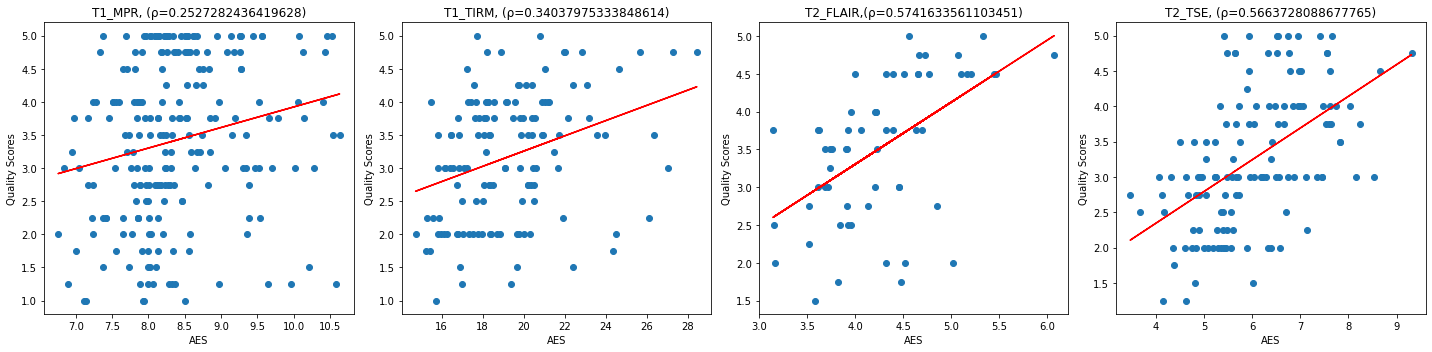

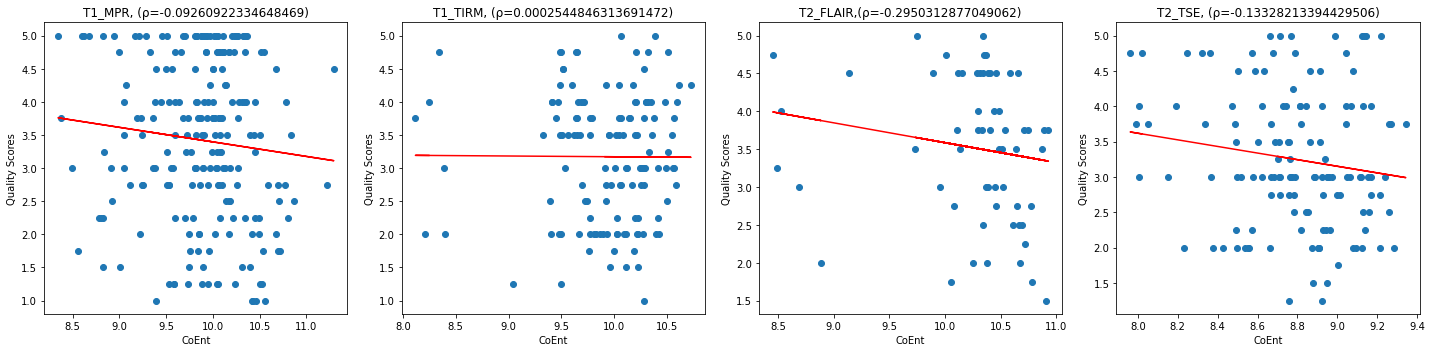

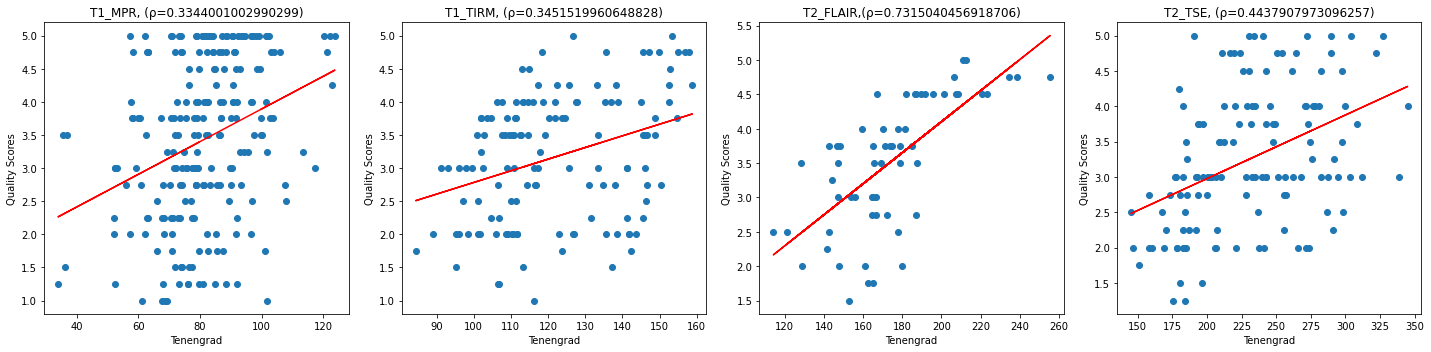

In [92]:
k=[0,1,2]
for i in k: 
  fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4, figsize=(20, 5))

  ax1.set_title('T1_MPR, (ρ='+ str(corm[i])+')')
  ax1.set_xlabel(met[i])
  ax1.set_ylabel('Quality Scores')
  ax1.scatter(np.array(pa1[sc[i]]).flatten(),mean1)
  z1 = np.polyfit(np.array(pa1[sc[i]]).flatten(),mean1, 1)
  p1 = np.poly1d(z1)
  ax1.plot(np.array(pa1[sc[i]]).flatten(),p1(np.array(pa1[sc[i]]).flatten()),"r")

  ax2.set_title('T1_TIRM, (ρ='+str(cort[i])+')')
  ax2.set_xlabel(met[i])
  ax2.set_ylabel('Quality Scores')
  ax2.scatter(np.array(pa2[sc[i]]).flatten(),mean2)
  z2 = np.polyfit(np.array(pa2[sc[i]]).flatten(),mean2, 1)
  p2 = np.poly1d(z2)
  ax2.plot(np.array(pa2[sc[i]]).flatten(),p2(np.array(pa2[sc[i]]).flatten()),"r")

  ax3.set_title('T2_FLAIR,(ρ='+str(corf[i])+')')
  ax3.set_xlabel(met[i])
  ax3.set_ylabel('Quality Scores')
  ax3.scatter(np.array(pa3[sc[i]]).flatten(),mean3)
  z3 = np.polyfit(np.array(pa3[sc[i]]).flatten(),mean3, 1)
  p3 = np.poly1d(z3)
  ax3.plot(np.array(pa3[sc[i]]).flatten(),p3(np.array(pa3[sc[i]]).flatten()),"r")

  ax4.set_title('T2_TSE, (ρ='+str(corts[i])+')')
  ax4.set_xlabel(met[i])
  ax4.set_ylabel('Quality Scores')
  ax4.scatter(np.array(pa4[sc[i]]).flatten(),mean4)
  z4 = np.polyfit(np.array(pa4[sc[i]]).flatten(),mean4, 1)
  p4 = np.poly1d(z4)
  ax4.plot(np.array(pa4[sc[i]]).flatten(),p4(np.array(pa4[sc[i]]).flatten()),"r")

  fig.tight_layout()
  plt.show()

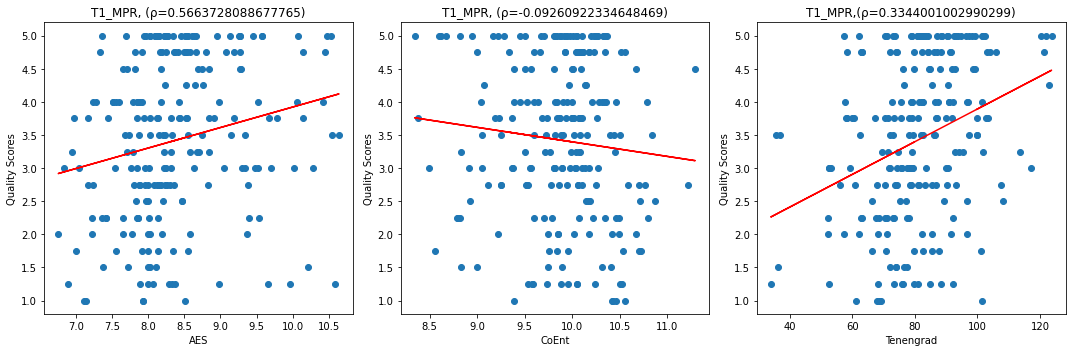

In [80]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3, figsize=(15, 5))

ax1.set_title('T1_MPR, (ρ='+ str(corm[0])+')')
ax1.set_xlabel(met[0])
ax1.set_ylabel('Quality Scores')
ax1.scatter(pa1[sc[0]],mean1)
z1 = np.polyfit(pa1[sc[0]],mean1, 1)
p1 = np.poly1d(z1)
ax1.plot(pa1[sc[0]],p1(pa1[sc[0]]),"r")

ax2.set_title('T1_MPR, (ρ='+str(corm[1])+')')
ax2.set_xlabel(met[1])
ax2.set_ylabel('Quality Scores')
ax2.scatter(pa1[sc[1]],mean1)
z2 = np.polyfit(pa1[sc[1]],mean1, 1)
p2 = np.poly1d(z2)
ax2.plot(pa1[sc[1]],p2(pa1[sc[1]]),"r")

ax3.set_title('T1_MPR,(ρ='+str(corm[2])+')')
ax3.set_xlabel(met[2])
ax3.set_ylabel('Quality Scores')
ax3.scatter(pa1[sc[2]],mean1)
z3 = np.polyfit(pa1[sc[2]],mean1, 1)
p3 = np.poly1d(z3)
ax3.plot(pa1[sc[2]],p3(pa1[sc[2]]),"r")

fig.tight_layout()
plt.show()

In [ ]:
print('aes mpr ',aes_mpr_spearman)
print('aes tirm ',aes_tirm_spearman)
print('aes flair ',aes_flair_spearman)
print('aes tse ',aes_tse_spearman)
print('coent mpr ',coent_mpr_spearman)
print('coent tirm ',coent_tirm_spearman)
print('coent flair ',coent_flair_spearman)
print('coent tse ',coent_tse_spearman)
print('tg mpr ',tg_mpr_spearman)
print('tg tirm ',tg_tirm_spearman)
print('tg flair ',tg_flair_spearman)
print('tg tse ',tg_tse_spearman)

In [78]:
pa4=pa4.drop(['index'],axis=1)

In [79]:
pa4

,0,1,2,3,4,5,6
0,Subject_01,MOCO_OFF_NOD,20.036237,7.050448,5.599148,8.702254,275.987509
1,Subject_01,MOCO_OFF_NOD_RR,20.155156,7.263797,6.288938,8.760656,256.050553
2,Subject_01,MOCO_OFF_STILL,20.147017,6.819245,7.818494,8.754383,297.608263
3,Subject_01,MOCO_ON_NOD,20.123486,6.915875,6.387464,8.761747,291.482220
4,Subject_01,MOCO_ON_NOD_RR,20.127748,6.968630,7.126767,8.666121,287.096033
...,...,...,...,...,...,...,...
127,Subject_22,MOCO_OFF_NOD_RR,20.425904,8.057919,3.676123,8.855239,145.244102
128,Subject_22,MOCO_OFF_STILL,20.429541,7.169748,5.638375,8.244142,224.105559
129,Subject_22,MOCO_ON_NOD,20.307461,7.730906,4.059071,8.682124,177.103222
130,Subject_22,MOCO_ON_NOD_RR,20.404631,7.870705,4.134003,8.714902,173.453689


In [64]:
df4

,0,1,2,3
0,TCLHC_01_TCLMOCO_OFF_NOD_T2_TSE_TRA_512_TE115M...,3,4,3
1,TCLHC_01_TCLMOCO_OFF_NOD_T2_TSE_TRA_512_TE115M...,3,3,3
2,TCLHC_01_TCLMOCO_OFF_STILL_T2_TSE_TRA_512_TE11...,3,3,4
3,TCLHC_01_TCLMOCO_ON_NOD_T2_TSE_TRA_512_TE115MS...,3,4,3
4,TCLHC_01_TCLMOCO_ON_NOD_T2_TSE_TRA_512_TE115MS...,3,3,3
...,...,...,...,...
127,TCLHC_22_TCLMOCO_OFF_NOD_T2_TSE_TRA_512_TE115M...,3,3,2
128,TCLHC_22_TCLMOCO_OFF_STILL_T2_TSE_TRA_512_TE11...,4,5,5
129,TCLHC_22_TCLMOCO_ON_NOD_T2_TSE_TRA_512_TE115MS...,3,3,3
130,TCLHC_22_TCLMOCO_ON_NOD_T2_TSE_TRA_512_TE115MS...,3,2,3
